_(c) J. Behrens, Universität Hamburg, Dept. Mathematik, 2020_

# Das S-I-R Modell

[Jörn Behrens](https://www.math.uni-hamburg.de/numgeo/) (joern.behrens@uni-hamburg.de)

## Einführung

In diesem Python Arbeitsblatt wird das S-I-R Modell erklärt. Das S-I-R Modell ist ein einfaches mathematisches Modell zur Berechnung einer Epidemie. S-I-R steht für die englischen Wörter

* Susceptible (anfällig),
* Infectious (ansteckend),
* Recovered/Removed (genesen/entfernt/rekonvaleszent).

Man teilt also eine Bevölkerung in drei Gruppen: 

1. $S$: die noch nicht infizierten, aber anfälligen, 
2. $I$: die infizierten und daher anstechenden und,
3. $R$: die genesenen (oder gestorbenen), und daher nicht mehr ansteckenden Personen.

Weiterhin werden zunächst folgende Annahmen getroffen:

1. Jedes Individuum kann die Krankheit nur einmal bekommen und ist danach immun (oder tot).
2. Ein Individuum kann nicht ohne krank zu werden sterben, also kann es entweder immer gesund sein oder sich infizieren, um anschließend wieder zu genesen oder zu sterben.
2. Die Anzahl der Individuen insgesamt ist konstant, das heißt genesene und tote Individuen werden der Gruppe $R$ zugezählt.
3. Infizierte Personen sind sofort ansteckend.
4. Sowohl die Ansteckungsrate als auch die Genesungsrate sind unabhängig von der Anzahl der jeweiligen Gruppen und werden als konstante Faktoren angenommen.
5. Jede der Gruppen agiert miteinander mit derselben Wahrscheinlichkeit.

Diese Annahmen sind starke Vereinfachungen der Wirklichkeit. Trotzdem ist das Modell gut geeignet den Mechanismus einer solchen Epidemie zu verstehen.

## Herleitung des Modells

### Proportionale Änderungen

Das Modell leitet sich aus verschiedenen Proportionalitätsbedingungen her:

1. In dem Maße, in dem die Anzahl der Infizierten zunimmt, ändert sich die Anzahl der Anfälligen. Genauer: Die Änderungsrate $S'$ der Anfälligen ist proportional zur Anzahl der Infizierten und der Anzahl der potentiell Anfälligen. Dabei betrachtet man den Anteil der Anfälligen relativ zur Gesamtbevölkerung $N$, denn die Wahrscheinlichkeit, dass ein Infizierter auf einen noch nicht Infizierten trifft hängt von diesem Verhältnis ab und nicht von der absoluten Anzahl Anfälliger. Die Änderungsrate ist negativ, weil sich ja immer mehr Individuen infizieren. Man erhält also
$$ S'\propto \frac{S}{N}\cdot I.$$
2. Die Änderungsrate der Infizierten, hingegen ist proportional zu Anzahl der neu angesteckten minus der Anzahl der Genesenen:
$$ I'\propto \frac{S}{N}\cdot I,\quad I'\propto I.$$
3. Die Änderungsrate der Gruppe der Genesenen ist abhängig von der Anzahl der Infizierten, die innerhalb einer Zeitspanne gesunden:
$$ R'\propto I.$$

Die drei Proportionalitätsbeziehungen hängen also jeweils miteinander zusammen. In dem Maße, in dem Gesunde sich anstecken, also die Gruppengröße $S$ sich verkleinert, vergrößert sich die Zahl der Infizierten $I$. Und die Gruppe der Infizierten $I$ verkleinert sich im gleichen Maß, wie sich die Gruppe $R$ der Genesenen vergrößert.

### Differentialgleichungen

Diese Proportionalitäten lassen sich in ein System von Differentialgleichungen schreiben. Fassen wir die Gruppengröße über einen Zeitraum als Funktion der Zeit auf, dann sind die Änderungsraten sind nichts anderes als Ableitungen dieser Funktionen in der Zeit. Die Proportionalitäten lassen sich als Änderungsraten in Form von konstanten (positiven oder negativen) Faktoren auffassen. Insgesamt erhält man das folgende System:

\begin{align}
\frac{dS}{dt} &= -c \frac{S}{N} I\\
\frac{dI}{dt} &= c \frac{S}{N} I - w I\\
\frac{dR}{dt} &= w I
\end{align}

Weiterhin gilt - wie in den Annahmen formuliert - dass die Gesamtzahl $N$ der Individuen sich nicht ändert, also
$$N = S + I + R.$$

## Daten

Um die obigen Gleichungen lösen zu können, bedarf es weiterer Informationen. Wir benötigen beispielsweise die Zahlen in mindestens zwei der Gruppen zum Beginn des Beobachtungszeitraumes, $S_0 = S(t=0)$ und $I_0=I(t=0)$, wobei wir $t=0$ als den Anfangszeitpunkt nehmen. Auch müssen wir die beiden Konstanten $c$, die Infektionsrate, und $w$, die Genesungsrate, kennen. 

Oft kann man davon ausgehen, dass die Anzahl der Genesenen zu Beginn eines Zeitraumes gleich Null ist. Kennt man dann die Anzahl der Infizierten, so lässt sich die Anzahl der Anfälligen aus der Gesamtzahl und der Beziehung $N=S + I + R$ herleiten.

Die Infektionsraten und Genesungsraten kann man sich aus Daten herleiten. In unserem Fall gehen wir wie folgt vor. Aus den bekannten Zahlen (beispielsweise des Robert-Koch-Insitutes oder der Weltgesundheitsorganisation WHO) können wir ersehen, dass sich die Zahl der Infizierten etwa alle 4 bis 5 Tage verdoppelt. Die Änderungsrate der Gruppe der Infizierten wäre also 2 (Verdoppelung) pro 4-5 Tage (das ist unsere Zeiteinheit). Wir setzen also $c\approx\frac{2}{4,5}$. 

Die Genesungsrate kann man aus der Zeit ableiten, die im Schnitt für die Heilung notwendig ist. Nach etwa 10-14 Tagen ist die Krankheit in der Regel entweder tödlich oder im wesentlichen geheilt. Wir werden also $w\approx\frac{1}{12}$ annehmen.


## Numerische Lösung

Jetzt wollen wir das S-I-R Modell numerisch lösen. Dazu wird hier Python verwendet. Zunächst implementieren wir die Rechte Seite als eine Funktion, die als Eingabe die drei Anfangsbedingungen _y0_ für $S(t=0)$, $I(t=0)$ und $R(t=0)$, die Zeitachse _t_, die Gesamtzahl der Individuen _N_, und die beiden Änderungsraten _c_ und _w_ annimmt. Als Ausgabe wirderden die drei Größen $S(t)$, $I(t)$ und $R(t)$ zurück gegeben, also die Funktionen für die Anfälligen, die Infizierten und die Genesenen.

In [74]:
def SIR(y0,t,N,c,w):
    # -- zunächst die Anfangsdaten - S, I, R:
    S = y0[0]
    I = y0[1]
    R = y0[2]
    # -- jetzt die Modellgleichungen
    r1 = -c*(S/N)*I
    r2 = c*(S/N)*I -w*I
    r3 = w*I
    # Rückgabe der berechneten rechten Seite
    return [r1, r2, r3]

Für die Anfangswerte werden wir versuchen realistische Werte für Deutschland zu nehmen. Wir befinden uns im Anfangsstadium der Infektion. Wir werden mit einem Zeitschritt von einem Tag rechnen. Die Simulation wird sich über ein Jahr, also 365 Tage erstrecken und wir werden für jeden Tag eine Zahl für die jeweiligen Gruppen erhalten.

Wir rechnen mit Fallzahlen umgerechnet auf 100.000 Einwohner nehmen die Zahl der Infizierten vom 15.3.2020, 15:00 als Wert für $t=0$ in unserer Berechnung. Zu dem Zeitpunkt waren im Bundesdurchschnitt $5,83$ Fälle pro 100.000 gemeldet, also ist $I(t=0) = 5,83$. Die Infektionsrate und die Genesungsrate hatten wir oben schon besprochen, so dass sich die folgenden Daten (Parameter) für unsere Simulation ergeben:
\begin{align}
N &= 100.000\\
I(t_0) &= 5,83\\
R(t_0) &= 0\\
S(t_0) &= N-I(t_0)-R(t_0) = 99.994,17\\
c &= \frac{2}{4.5}\\
w &= \frac{1}{12}
\end{align}

Text(0, 0.5, 'Individuen/100.000')

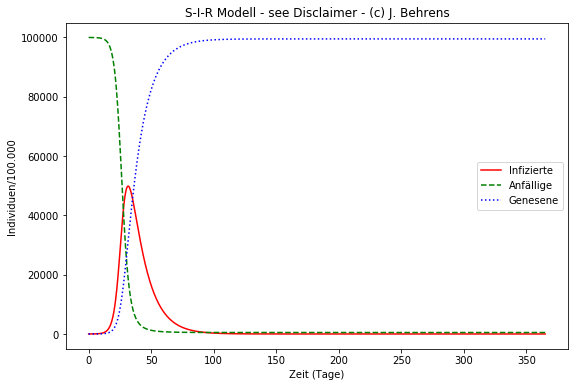

In [75]:
# -- Lade notwendige Python Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
from scipy.integrate import odeint

# -- Definiere Anfangsdaten
N = 100000 # Gesamtzahl der Individuen
I0 = 5.83  # Infizierte Fälle zum Anfangszeitpunkt
R0 = 0.    # Anzahl Genesener zum Anfangszeitpunkt
S0 = N - I0 - R0 # Anzahl noch Gesunder zum Anfangszeitpunkt

cc = (2/(4.5))   # Infektionsrate
ww = 1/12   # Genesungsrate

# -- definiere die Daten für den Gleichungslöser
y0 = [S0, I0, R0]
t  = np.linspace(0,365.,1460) # rechne für 365 Tage mit 4 Schritten pro Tag

# -- Löse
SIRsol = odeint(SIR, y0, t, args=(N, cc, ww))
S = SIRsol[:,0]
I = SIRsol[:,1]
R = SIRsol[:,2]

# -- Stelle die Lösung graphisch dar
h1 = plt.plot(t,I,'r-',label='Infizierte')
h2 = plt.plot(t,S,'g--',label='Anfällige')
h3 = plt.plot(t,R,'b:',label='Genesene')
plt.legend(loc='center right')
plt.title('S-I-R Modell - see Disclaimer - (c) J. Behrens')
plt.xlabel('Zeit (Tage)')
plt.ylabel('Individuen/100.000')

## Interpretation des Modells

In der Graphik oben erkennt man, dass nach ca. 10 Tagen noch wenig passiert ist. Erst etwa am 25sten Tag erreicht man ca. 20.000 Infizierte pro 100.000 Einwohner und das Maximum mit ca. 50.000 Infizierten ist nach etwa 40 Tagen erreicht. Man kann sich leicht ausrechnen, dass eine solche Zahl hochgerechnet auf die Bundesbevölkerung eine immense Zahl ist. Selbst wenn man weiß dann wohl "nur" 6% der Infizierten tatsächlich intensive medizinische Versorgung benötigen, wären das immer noch etwa 2,4 Millionen Individuen... 

Immerhin sieht man auch, dass nach etwa 100 Tagen die Epidemie vorbei ist, weil zu diesem Zeitpunkt sich fast alle angesteckt haben und die Angesteckten inzwischen wieder gesund geworden (oder gestorben) sind.

**Wie kann jetzt die Zahl der Infizierten verringert werden?** Wir könnten einerseits die Anzahl der Anfälligen senken, indem wir impfen. Leider existiert für Corona noch keine Impfung. Es bleibt also der einzige Parameter, den wir tatsächlich beeinflussen können: **die Infektionsrate**. Die Infektionsrate zu verringern bedeutet, die Infizierten zu isolieren. Und das soll mit den gegenwärtigen Maßnahmen erreicht werden. 

Nehmen wir also einmal an, die Infektionsrate könnte durch die einschneidenden Maßnahmen auf etwa die Hälfte gesenkt werden. Dann können wir eine solche Rechnung nochmals mit dem neuen Wert für den Parameter $c$ durchführen:

Text(0, 0.5, 'Individuen/100.000')

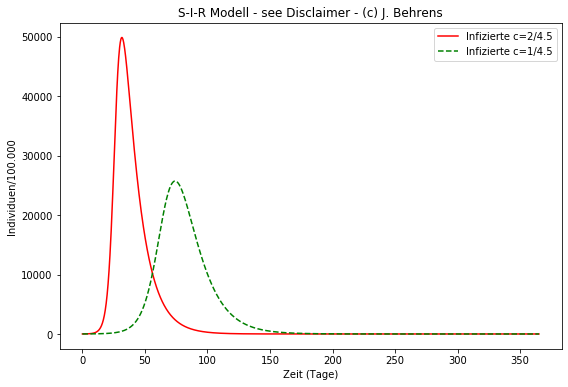

In [76]:
cc_halb = cc*0.5 # Halbierung der Infektionsrate
SIRhalb = odeint(SIR, y0, t, args=(N, cc_halb, ww))
#S_halb = SIRhalb[:,0]
I_halb = SIRhalb[:,1]
#R_halb = SIRhalb[:,2]

# -- Stelle die Lösung graphisch dar
h1 = plt.plot(t,I,'r-',label='Infizierte c=2/4.5')
h2 = plt.plot(t,I_halb,'g--',label='Infizierte c=1/4.5')
plt.legend(loc='upper right')
plt.title('S-I-R Modell - see Disclaimer - (c) J. Behrens')
plt.xlabel('Zeit (Tage)')
plt.ylabel('Individuen/100.000')

## Interpretation des modifizierten Modells

Mit dieser Verlangsamung der Infektionsausbreitung erreichen wir nun folgendes: Einerseits tritt die größte Zahl infizierte Individuen jetzt erst nach ca. 90 Tagen auf, dafür erreichen wir aber auch nur etwa maximal 25.000 Infizierte pro 100.000 Einwohner. Wieder hochgerechnet und angenommen, dass 6% der Fälle auch intensivmedizinisch versorgt werden müssen bedeutet das eine (gleichzeitige) Anzahl von Kranken von 1,2 Millionen, also eine Halbierung der ersten Zahl!

## Warnung (Disclaimer)

Die hier verwendeten Daten sind nicht offizielle Daten und das Modell, ist ein sehr stark vereinfachtes Modell. Die hier gezeigten Beispielrechnungen dienen dazu die Mathematik hinter epidemiologischen Modellrechnungen zu veranschaulichen und zu verstehen, wie der Mechanismus solcher Simulationen funktioniert. **Die Werte sind nicht repräsentativ und können nicht für politische Entscheidungen, Meinungsbildung, oder entsprechende Maßnahmen verwendet werden.** 

Der Autor übernimmt keinerlei Haftung für die Verwendung dieser Modellrechnungen. Sie werden der Öffentlichkeit lediglich zu didaktischen Zwecken überlassen. 

Dieses Jupyter/Python Notebook wird unter der [Creative Commons Lizenz CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) veröffentlicht.

## Referenzen

1. Robert-Koch-Institut (2020): SARS-CoV-2 Steckbrief zur Coronavirus-Krankheit-2019 (COVID-19), https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html (letzter Zugriff: 19.03.2020).
2. Max-Delbück-Zentrum (2020): COVID-19 Bundesländer in Deutschland v0.004, https://covid19germany.mdc-berlin.de (letzter Zugriff: 19.03.2020).
3. Wikipedia: SIR-Modell, https://de.wikipedia.org/wiki/SIR-Modell (letzter Zugriff: 19.03.2020).